<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/Titanic%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [17]:
from google.colab import drive

https://www.kaggle.com/datasets/brendan45774/test-file

In [18]:
titanic=pd.read_csv('/content/titanic.csv')

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Deleting unnecessary columns**

In [20]:
titanic.drop('PassengerId', axis=1, inplace=True)

In [21]:
titanic.drop('Name', axis=1, inplace=True)

In [22]:
titanic.drop('Ticket', axis=1, inplace=True)

In [23]:
titanic.drop('Cabin', axis=1, inplace=True)

In [24]:
titanic.drop('Embarked', axis=1, inplace=True)

In [25]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [26]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Inconsistent data handling**

In [27]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [28]:
titanic.loc[pd.isnull(titanic['Age'])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [29]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [30]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [31]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [32]:
column_names = ['Pclass', 'Sex','Age', 'SibSp', 'Parch' ,'Fare','Survived']

In [33]:

titanic = titanic.reindex(columns=column_names)

In [34]:
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.000000,1,0,7.2500,0
1,1,female,38.000000,1,0,71.2833,1
2,3,female,26.000000,0,0,7.9250,1
3,1,female,35.000000,1,0,53.1000,1
4,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,0
887,1,female,19.000000,0,0,30.0000,1
888,3,female,29.699118,1,2,23.4500,0
889,1,male,26.000000,0,0,30.0000,1


## **Predictors and class split**

In [35]:
X_titanic=titanic.iloc[:,0:6].values

In [36]:
X_titanic

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', 29.69911764705882, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [37]:
Y_titanic=titanic.iloc[:,6].values

In [38]:
Y_titanic

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## **Label Encoder**

In [39]:
from sklearn import preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder=preprocessing.LabelEncoder()

In [42]:
X_titanic[:,1]=encoder.fit_transform(X_titanic[:,1])

In [43]:
X_titanic

array([[3, 1, 22.0, 1, 0, 7.25],
       [1, 0, 38.0, 1, 0, 71.2833],
       [3, 0, 26.0, 0, 0, 7.925],
       ...,
       [3, 0, 29.69911764705882, 1, 2, 23.45],
       [1, 1, 26.0, 0, 0, 30.0],
       [3, 1, 32.0, 0, 0, 7.75]], dtype=object)

In [44]:
correlations = titanic.corr(method='pearson')

In [45]:
correlations

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


## **Normalization values**

In [46]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled = data_scaler.fit_transform(X_titanic)

In [47]:
X_titanic=data_rescaled

In [48]:
X_titanic

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.01546857],
       ...,
       [1.        , 0.        , 0.36792055, 0.125     , 0.33333333,
        0.04577135],
       [0.        , 1.        , 0.32143755, 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 0.39683338, 0.        , 0.        ,
        0.01512699]])

## **Training base and test base**

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_titanic_treinamento, X_titanic_teste, Y_titanic_treinamento, Y_titanic_teste = train_test_split(X_titanic, Y_titanic, test_size = 0.2, random_state = 0)

In [51]:
import pickle

In [52]:
with open('titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_titanic_treinamento, X_titanic_teste, Y_titanic_treinamento, Y_titanic_teste], f)

In [53]:
with open('titanic.pkl', 'rb') as f:
  X_titanic_treinamento, X_titanic_teste, Y_titanic_treinamento, Y_titanic_teste = pickle.load(f)

## **Neural networks**

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
rede_neural_titanic = MLPClassifier(max_iter=4000, verbose=True, tol=0.000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))

In [56]:
rede_neural_titanic.fit(X_titanic_treinamento, Y_titanic_treinamento)

Iteration 1, loss = 0.64541891
Iteration 2, loss = 0.63687236
Iteration 3, loss = 0.62867270
Iteration 4, loss = 0.62145559
Iteration 5, loss = 0.61411852
Iteration 6, loss = 0.60690340
Iteration 7, loss = 0.59981904
Iteration 8, loss = 0.59335393
Iteration 9, loss = 0.58649155
Iteration 10, loss = 0.57959572
Iteration 11, loss = 0.57282619
Iteration 12, loss = 0.56667306
Iteration 13, loss = 0.55948322
Iteration 14, loss = 0.55279771
Iteration 15, loss = 0.54655197
Iteration 16, loss = 0.54001804
Iteration 17, loss = 0.53372817
Iteration 18, loss = 0.52793493
Iteration 19, loss = 0.52249005
Iteration 20, loss = 0.51715091
Iteration 21, loss = 0.51262736
Iteration 22, loss = 0.50818021
Iteration 23, loss = 0.50365587
Iteration 24, loss = 0.50014686
Iteration 25, loss = 0.49636706
Iteration 26, loss = 0.49356266
Iteration 27, loss = 0.49020446
Iteration 28, loss = 0.48772291
Iteration 29, loss = 0.48528349
Iteration 30, loss = 0.48296450
Iteration 31, loss = 0.48084857
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=4000, verbose=True)

In [57]:
previsoes = rede_neural_titanic.predict(X_titanic_teste)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [58]:
Y_titanic_teste

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [59]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_titanic_teste, previsoes)

0.8212290502793296

0.8212290502793296

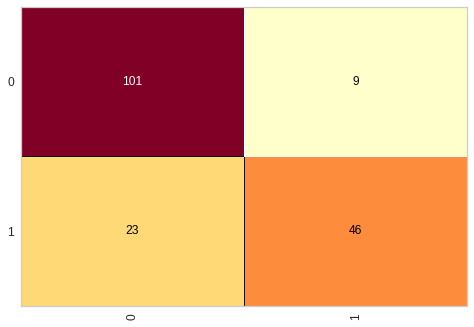

In [60]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_titanic)
cm.fit(X_titanic_treinamento, Y_titanic_treinamento)
cm.score(X_titanic_teste, Y_titanic_teste)

## **Naive Bayes**

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
naive_titanic=GaussianNB()


In [63]:
naive_titanic.fit(X_titanic_teste, Y_titanic_teste)


GaussianNB()

In [64]:
previsoes = naive_titanic.predict(X_titanic_teste)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [65]:
Y_titanic_teste

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
accuracy_score(Y_titanic_teste, previsoes)

0.7877094972067039

In [68]:
print(classification_report(Y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [69]:
confusion_matrix(Y_titanic_teste, previsoes)

array([[96, 14],
       [24, 45]])

# **Decision Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
arvore_titanic = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_titanic.fit(X_titanic_treinamento, Y_titanic_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
previsoes = arvore_titanic.predict(X_titanic_teste)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [73]:
Y_titanic_teste

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [74]:
accuracy_score(Y_titanic_teste, previsoes)

0.7597765363128491

In [75]:
print(classification_report(Y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.70      0.67      0.68        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



## **Randon Forest**

In [76]:
from sklearn import tree

[Text(0.376887077294686, 0.9833333333333333, 'X[1] <= 0.5\nentropy = 0.96\nsamples = 712\nvalue = [439, 273]'),
 Text(0.19202898550724637, 0.95, 'X[0] <= 0.75\nentropy = 0.819\nsamples = 247\nvalue = [63, 184]'),
 Text(0.08695652173913043, 0.9166666666666666, 'X[2] <= 0.026\nentropy = 0.33\nsamples = 132\nvalue = [8, 124]'),
 Text(0.07729468599033816, 0.8833333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0966183574879227, 0.8833333333333333, 'X[5] <= 0.056\nentropy = 0.301\nsamples = 131\nvalue = [7, 124]'),
 Text(0.07729468599033816, 0.85, 'X[5] <= 0.055\nentropy = 0.51\nsamples = 53\nvalue = [6, 47]'),
 Text(0.06763285024154589, 0.8166666666666667, 'X[4] <= 0.083\nentropy = 0.457\nsamples = 52\nvalue = [5, 47]'),
 Text(0.057971014492753624, 0.7833333333333333, 'X[2] <= 0.46\nentropy = 0.571\nsamples = 37\nvalue = [5, 32]'),
 Text(0.028985507246376812, 0.75, 'X[2] <= 0.34\nentropy = 0.391\nsamples = 26\nvalue = [2, 24]'),
 Text(0.01932367149758454, 0.7166666666666

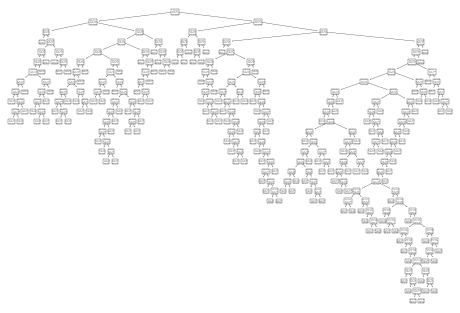

In [77]:
tree.plot_tree(arvore_titanic)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
random_forest_titanic = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_titanic.fit(X_titanic_treinamento, Y_titanic_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [80]:
previsoes = random_forest_titanic.predict(X_titanic_teste)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [81]:
Y_titanic_teste

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [82]:
accuracy_score(Y_titanic_teste, previsoes)

0.8379888268156425

0.8379888268156425

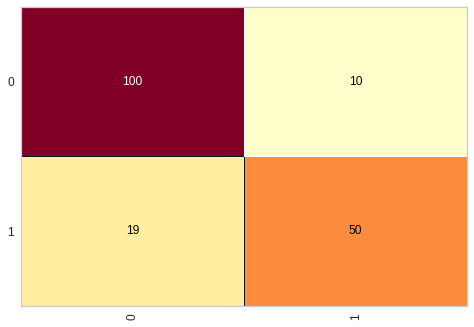

In [83]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(random_forest_titanic)
cm.fit(X_titanic_treinamento, Y_titanic_treinamento)
cm.score(X_titanic_teste, Y_titanic_teste)

In [84]:
print(classification_report(Y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



## **KNN**

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn_titanic = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_titanic.fit(X_titanic_treinamento, Y_titanic_treinamento)

KNeighborsClassifier()

In [87]:
previsoes = knn_titanic.predict(X_titanic_teste)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [88]:
Y_titanic_teste

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [89]:
accuracy_score(Y_titanic_teste, previsoes)

0.7988826815642458

0.7988826815642458

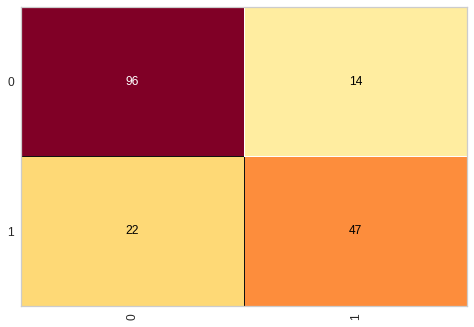

In [90]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn_titanic)
cm.fit(X_titanic_treinamento, Y_titanic_treinamento)
cm.score(X_titanic_teste, Y_titanic_teste)

In [91]:
print(classification_report(Y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



## **Regression Logistic**

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
titanic_logistic = LogisticRegression(random_state = 1)
titanic_logistic.fit(X_titanic_treinamento, Y_titanic_treinamento)

LogisticRegression(random_state=1)

In [94]:
titanic_logistic.intercept_

array([3.12547371])

In [95]:
titanic_logistic.coef_

array([[-1.82449744, -2.52667916, -2.1517288 , -1.6064496 , -0.37265074,
         0.53229623]])

In [96]:
previsoes = titanic_logistic.predict(X_titanic_teste)
previsoes

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [97]:
Y_titanic_teste

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [98]:
accuracy_score(Y_titanic_teste, previsoes)

0.776536312849162

In [99]:
print(classification_report(Y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.72      0.68      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.78       179



## **SVC**

In [100]:
from sklearn.svm import SVC

In [101]:
svm_titanic = SVC(kernel='linear', random_state=1)
svm_titanic.fit(X_titanic_treinamento, Y_titanic_treinamento)

SVC(kernel='linear', random_state=1)

In [102]:
previsoes = svm_titanic.predict(X_titanic_teste)
previsoes

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [103]:
Y_titanic_teste

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [104]:
accuracy_score(Y_titanic_teste, previsoes)

0.7877094972067039

## **Decision Criterion**

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [106]:
X_titanic = np.concatenate((X_titanic_treinamento, X_titanic_teste), axis = 0)

In [107]:
Y_titanic = np.concatenate((Y_titanic_treinamento, Y_titanic_teste), axis = 0)

In [108]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [109]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_titanic, Y_titanic)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
0.833921285543908


In [110]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [111]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_titanic, Y_titanic)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 10, 'p': 1}
0.8081036971941498


In [112]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [113]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_titanic, Y_titanic)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001}
0.7979976147134519


In [114]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [115]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_titanic, Y_titanic)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'poly', 'tol': 0.001}
0.8181972255351202


In [116]:
parametros = {'activation': ['relu', 'logistic', 'identity'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [117]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_titanic, Y_titanic)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [118]:
from sklearn.model_selection import cross_val_score, KFold

In [119]:
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []


for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)
  scores = cross_val_score(random_forest, X_titanic, Y_titanic, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors= 5, p= 1)
  scores = cross_val_score(knn, X_titanic, Y_titanic, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C= 1.0, solver= 'lbfgs', tol= 0.0001)
  scores = cross_val_score(logistica, X_titanic, Y_titanic, cv = kfold)
  resultados_logistica.append(scores.mean())
  
  svm = SVC(C= 2.0, kernel= 'poly', tol= 0.001)
  scores = cross_val_score(svm, X_titanic, Y_titanic, cv = kfold)
  resultados_svm.append(scores.mean())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [120]:
resultados = pd.DataFrame({'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm})

In [121]:
resultados

,Random forest,KNN,Logistica,SVM
0,0.838439,0.810362,0.797940,0.819301
1,0.817066,0.811448,0.795680,0.819263
2,0.828252,0.811411,0.800150,0.815868
3,0.826080,0.812584,0.797990,0.819301
4,0.820487,0.819351,0.794682,0.818277
5,0.827054,0.820325,0.794594,0.814794
6,0.829413,0.815968,0.798040,0.821536
7,0.840599,0.813645,0.796841,0.821548
8,0.822584,0.814732,0.795743,0.819276
9,0.823720,0.817004,0.797965,0.818102


In [122]:
resultados.describe()

,Random forest,KNN,Logistica,SVM
count,30.000000,30.000000,30.000000,30.000000
mean,0.829439,0.812454,0.796746,0.817690
std,0.005549,0.004761,0.001836,0.002854
min,0.817066,0.801373,0.793533,0.811448
25%,0.826061,0.810247,0.795718,0.816155
50%,0.829419,0.812615,0.795799,0.818127
75%,0.833876,0.815924,0.797990,0.819301
max,0.840599,0.821548,0.801323,0.821586


In [123]:
resultados.var()

Random forest    0.000031
KNN              0.000023
Logistica        0.000003
SVM              0.000008
dtype: float64

In [124]:
(resultados.std() / resultados.mean()) * 100

Random forest    0.669009
KNN              0.586016
Logistica        0.230426
SVM              0.348978
dtype: float64

In [125]:
alpha = 0.05

## **Shapiro Test**

In [126]:
from scipy.stats import shapiro

In [127]:
 shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm)

(ShapiroResult(statistic=0.98688805103302, pvalue=0.9648323655128479),
 ShapiroResult(statistic=0.9838182330131531, pvalue=0.9153999090194702),
 ShapiroResult(statistic=0.9329111576080322, pvalue=0.05869977921247482),
 ShapiroResult(statistic=0.9382736086845398, pvalue=0.08172975480556488))

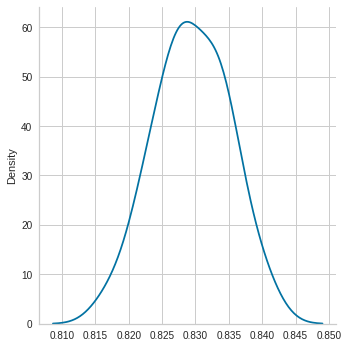

In [128]:
sns.displot(resultados_random_forest, kind = 'kde');

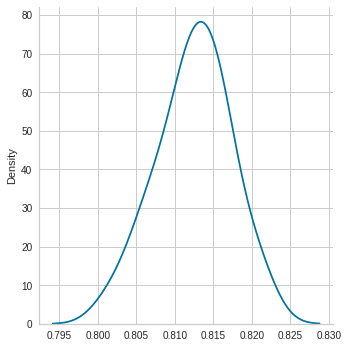

In [129]:
sns.displot(resultados_knn, kind = 'kde');

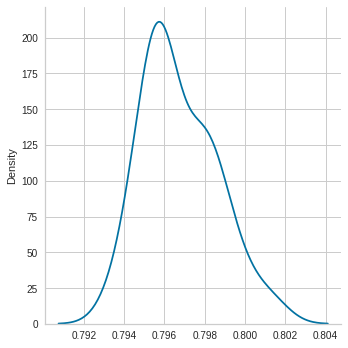

In [130]:
sns.displot(resultados_logistica, kind = 'kde');

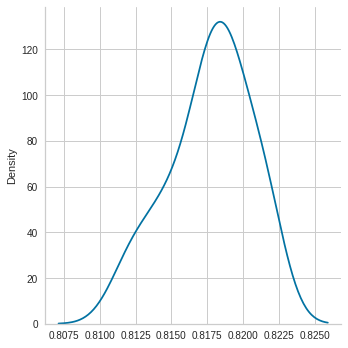

In [131]:
sns.displot(resultados_svm, kind = 'kde');

In [132]:
from scipy.stats import f_oneway

In [133]:
_, p = f_oneway(resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm)
p

2.817795596136496e-57

## **Comparision Results**

In [134]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm]),
                         'algoritmo': [ 'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',]}

In [135]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.838439,random_forest
1,0.817066,random_forest
2,0.828252,random_forest
3,0.826080,random_forest
4,0.820487,random_forest
...,...,...
115,0.821536,svm
116,0.817066,svm
117,0.812522,svm
118,0.811448,svm


In [136]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [137]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [138]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower  upper  reject
----------------------------------------------------------------
          knn     logistica  -0.0157 0.001 -0.0184 -0.013   True
          knn random_forest    0.017 0.001  0.0143 0.0197   True
          knn           svm   0.0052 0.001  0.0025 0.0079   True
    logistica random_forest   0.0327 0.001    0.03 0.0354   True
    logistica           svm   0.0209 0.001  0.0182 0.0237   True
random_forest           svm  -0.0117 0.001 -0.0145 -0.009   True
----------------------------------------------------------------


In [139]:
resultados.mean()

Random forest    0.829439
KNN              0.812454
Logistica        0.796746
SVM              0.817690
dtype: float64

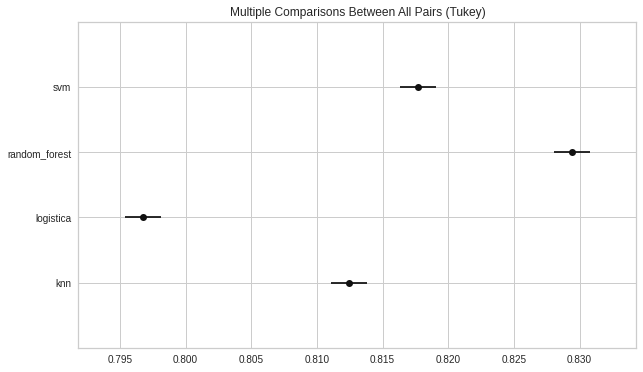

In [140]:
teste_estatistico.plot_simultaneous();

In [141]:
with open('titanic.pkl', 'rb') as f:
  X_titanic_treinamento, X_titanic_teste, Y_titanic_treinamento, Y_titanic_teste = pickle.load(f)

In [142]:
X_titanic = np.concatenate((X_titanic_treinamento, X_titanic_teste), axis = 0)


In [143]:
X_titanic = np.concatenate((X_titanic_treinamento, X_titanic_teste), axis = 0)

In [144]:
Y_titanic = np.concatenate((Y_titanic_treinamento, Y_titanic_teste), axis = 0)

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
random_forest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)
random_forest.fit(X_titanic, Y_titanic)


RandomForestClassifier(min_samples_split=10)

In [147]:
import pickle

In [148]:
pickle.dump(random_forest, open('random_forest_final.sav', 'wb'))

In [149]:
random_forest=pickle.load(open('random_forest_final.sav', 'rb'))

In [150]:
novo_registro = X_titanic[10]

In [151]:
novo_registro

array([0.5       , 0.        , 0.30887158, 0.125     , 0.16666667,
       0.0585561 ])

In [152]:
novo_registro = novo_registro.reshape(1, -1)

In [153]:
random_forest.predict(novo_registro)

array([1])